In [2]:
import sys
print(sys.path)
sys.path.append('./')

['E:\\学习\\5药物研发\\靶点发现\\下游任务\\整合去批次\\unified\\code\\analysis\\5Time_and_spatial\\embryo_new', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\python39.zip', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\DLLs', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39', '', 'C:\\Users\\10360\\AppData\\Roaming\\Python\\Python39\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\win32\\lib', 'C:\\Users\\10360\\anaconda3\\envs\\py39\\lib\\site-packages\\Pythonwin']


In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
from scCorrect import scCorrect, label_transfer
from scCorrect import metrics

In [4]:
sc.set_figure_params(dpi=300, figsize=(4, 4), frameon=False)    # TODO 是否画边框

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [5]:
path_results = './log/mouse_scCorrect_30000/'

In [6]:
def clear_fig(fig):
    if fig:
        fig.axes[0].set_xlabel(None)
        fig.axes[0].set_ylabel(None)
        fig.tight_layout()
    else:
        pass
    return fig

In [6]:
adata_EMTAB3321 = sc.read_h5ad('./data/Embryos_Mouse_EMTAB3321.h5ad')

adata_GSE41873 = sc.read_h5ad('./data/Embryos_Mouse_GSE41873.h5ad')

adata_GSE45719 = sc.read_h5ad('./data/Embryos_Mouse_GSE45719.h5ad')

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
print(adata_EMTAB3321.X.max())
print(adata_GSE41873.X.max())
print(adata_GSE45719.X.max())


266774.0
4869.2
693974.0


In [8]:
sc.pp.normalize_total(adata_EMTAB3321)
sc.pp.log1p(adata_EMTAB3321)

sc.pp.normalize_total(adata_GSE41873)
sc.pp.log1p(adata_GSE41873)

sc.pp.normalize_total(adata_GSE45719)
sc.pp.log1p(adata_GSE45719)



In [9]:
conditions = ['adata_EMTAB3321', 'adata_GSE41873', 'adata_GSE45719']
conditions

['adata_EMTAB3321', 'adata_GSE41873', 'adata_GSE45719']

In [10]:
data_list = [adata_EMTAB3321, adata_GSE41873, adata_GSE45719]
data_list

[AnnData object with n_obs × n_vars = 124 × 37009
     obs: 'cell_type', 'index'
     var: 'ENSG'
     uns: 'log1p',
 AnnData object with n_obs × n_vars = 17 × 13879
     obs: 'cell_type', 'batch', 'index'
     uns: 'log1p',
 AnnData object with n_obs × n_vars = 294 × 22431
     obs: 'cell_type', 'index'
     uns: 'log1p']

# cross_species

In [15]:
adata_human = sc.read_h5ad('./data/Embryos_Human_GSE41873.h5ad')
adata_human

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 29 × 14766
    obs: 'cell_type', 'batch', 'index'

In [16]:
print(adata_human.X.max())

15839.12


In [17]:
sc.pp.normalize_total(adata_human)
sc.pp.log1p(adata_human)


In [19]:
# gene_map
gene_map = pd.read_csv('gene_matches_1v1_human2mouse.csv')
gene_map

raw-pancreas-human-Baron.h5ad raw-pancreas-mouse-Baron.h5ad
0                            MT-ND1                        mt-Nd1
1                            MT-ND2                        mt-Nd2
2                            MT-CO1                        mt-Co1
3                            MT-CO2                        mt-Co2
4                           MT-ATP8                       mt-Atp8
...                             ...                           ...
16592                      MIR103A1                      Mir103-1
16593                     RNU6-387P                       Gm24531
16594                     RNU6-910P                       Gm24537
16595                    AC012354.8                       Gm27283
16596                    AC005722.2                       Gm23663

[16597 rows x 2 columns]

In [20]:
gene_map_dict = {item[0]: item[1] for item in gene_map.to_numpy()}

In [21]:
adata_human = adata_human[:, adata_human.var_names.isin(gene_map_dict.keys())]
adata_human

View of AnnData object with n_obs × n_vars = 29 × 11467
    obs: 'cell_type', 'batch', 'index'
    uns: 'log1p'

In [22]:
adata_human.var.index = [gene_map_dict[item] for item in adata_human.var.index]

In [23]:
adata_human.X.max()

ArrayView(9.672264, dtype=float32)

In [24]:
conditions = ['adata_EMTAB3321', 'adata_GSE41873', 'adata_GSE45719', 'adata_human']
conditions

['adata_EMTAB3321', 'adata_GSE41873', 'adata_GSE45719', 'adata_human']

In [25]:
data_list = [adata_EMTAB3321, adata_GSE41873, adata_GSE45719, adata_human]
data_list

[AnnData object with n_obs × n_vars = 124 × 37009
     obs: 'cell_type', 'index'
     var: 'ENSG'
     uns: 'log1p',
 AnnData object with n_obs × n_vars = 17 × 13879
     obs: 'cell_type', 'batch', 'index'
     uns: 'log1p',
 AnnData object with n_obs × n_vars = 294 × 22431
     obs: 'cell_type', 'index'
     uns: 'log1p',
 View of AnnData object with n_obs × n_vars = 29 × 11467
     obs: 'cell_type', 'batch', 'index'
     uns: 'log1p']

In [7]:
path_results = './log/mouse_human_scCorrect_30000/'

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2023-08-20 10:23:05,382 - root - INFO - Raw dataset shape: (464, 9289)
2023-08-20 10:23:05,382 - root - INFO - Raw dataset shape: (464, 9289)
... storing 'cell_type' as categorical
... storing 'index' as categorical
2023-08-20 10:23:06,290 - root - INFO - Batch specific maxabs scaling
2023-08-20 10:23:06,290 - root - INFO - Batch specific maxabs scaling
E:\学习\5药物研发\靶点发现\下游任务\整合去批次\unified\code\scCorrect\data.py:309: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  adata.X[idx[i * chunk_size:(i + 1) * chunk_size]] = scaler.transform(
C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  util

EarlyStopping: run 88 epoch


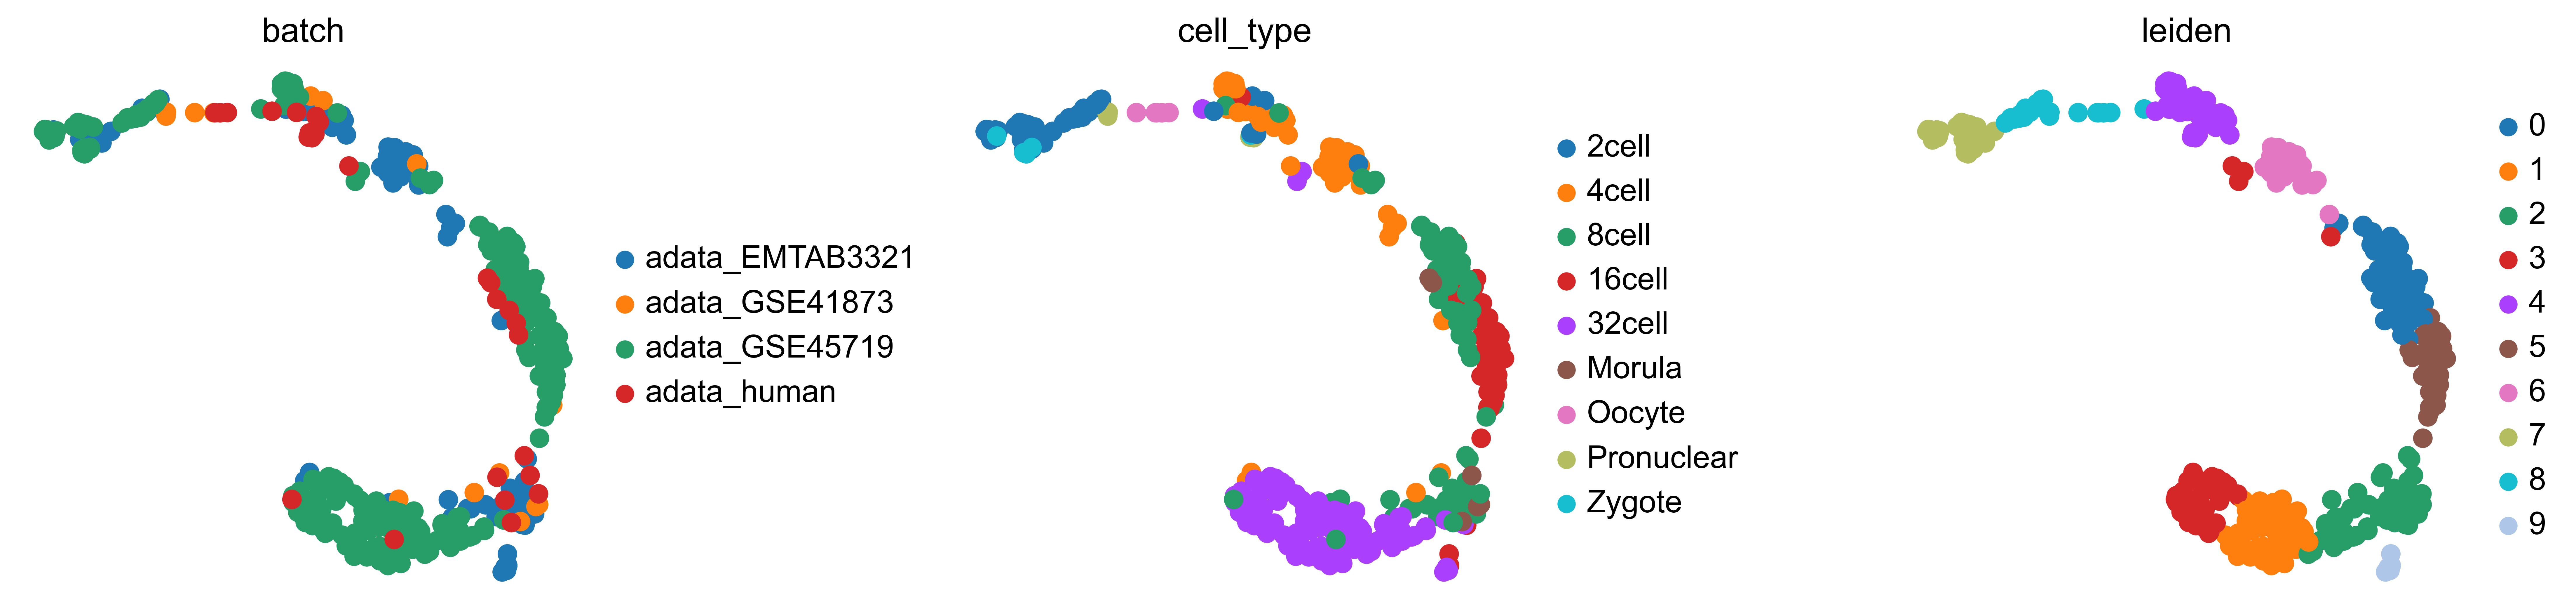

2023-08-20 10:23:39,433 - root - INFO - batch_entropy_mixing_score: 0.588
2023-08-20 10:23:39,433 - root - INFO - batch_entropy_mixing_score: 0.588
2023-08-20 10:23:39,439 - root - INFO - silhouette_score: 0.169
2023-08-20 10:23:39,439 - root - INFO - silhouette_score: 0.169


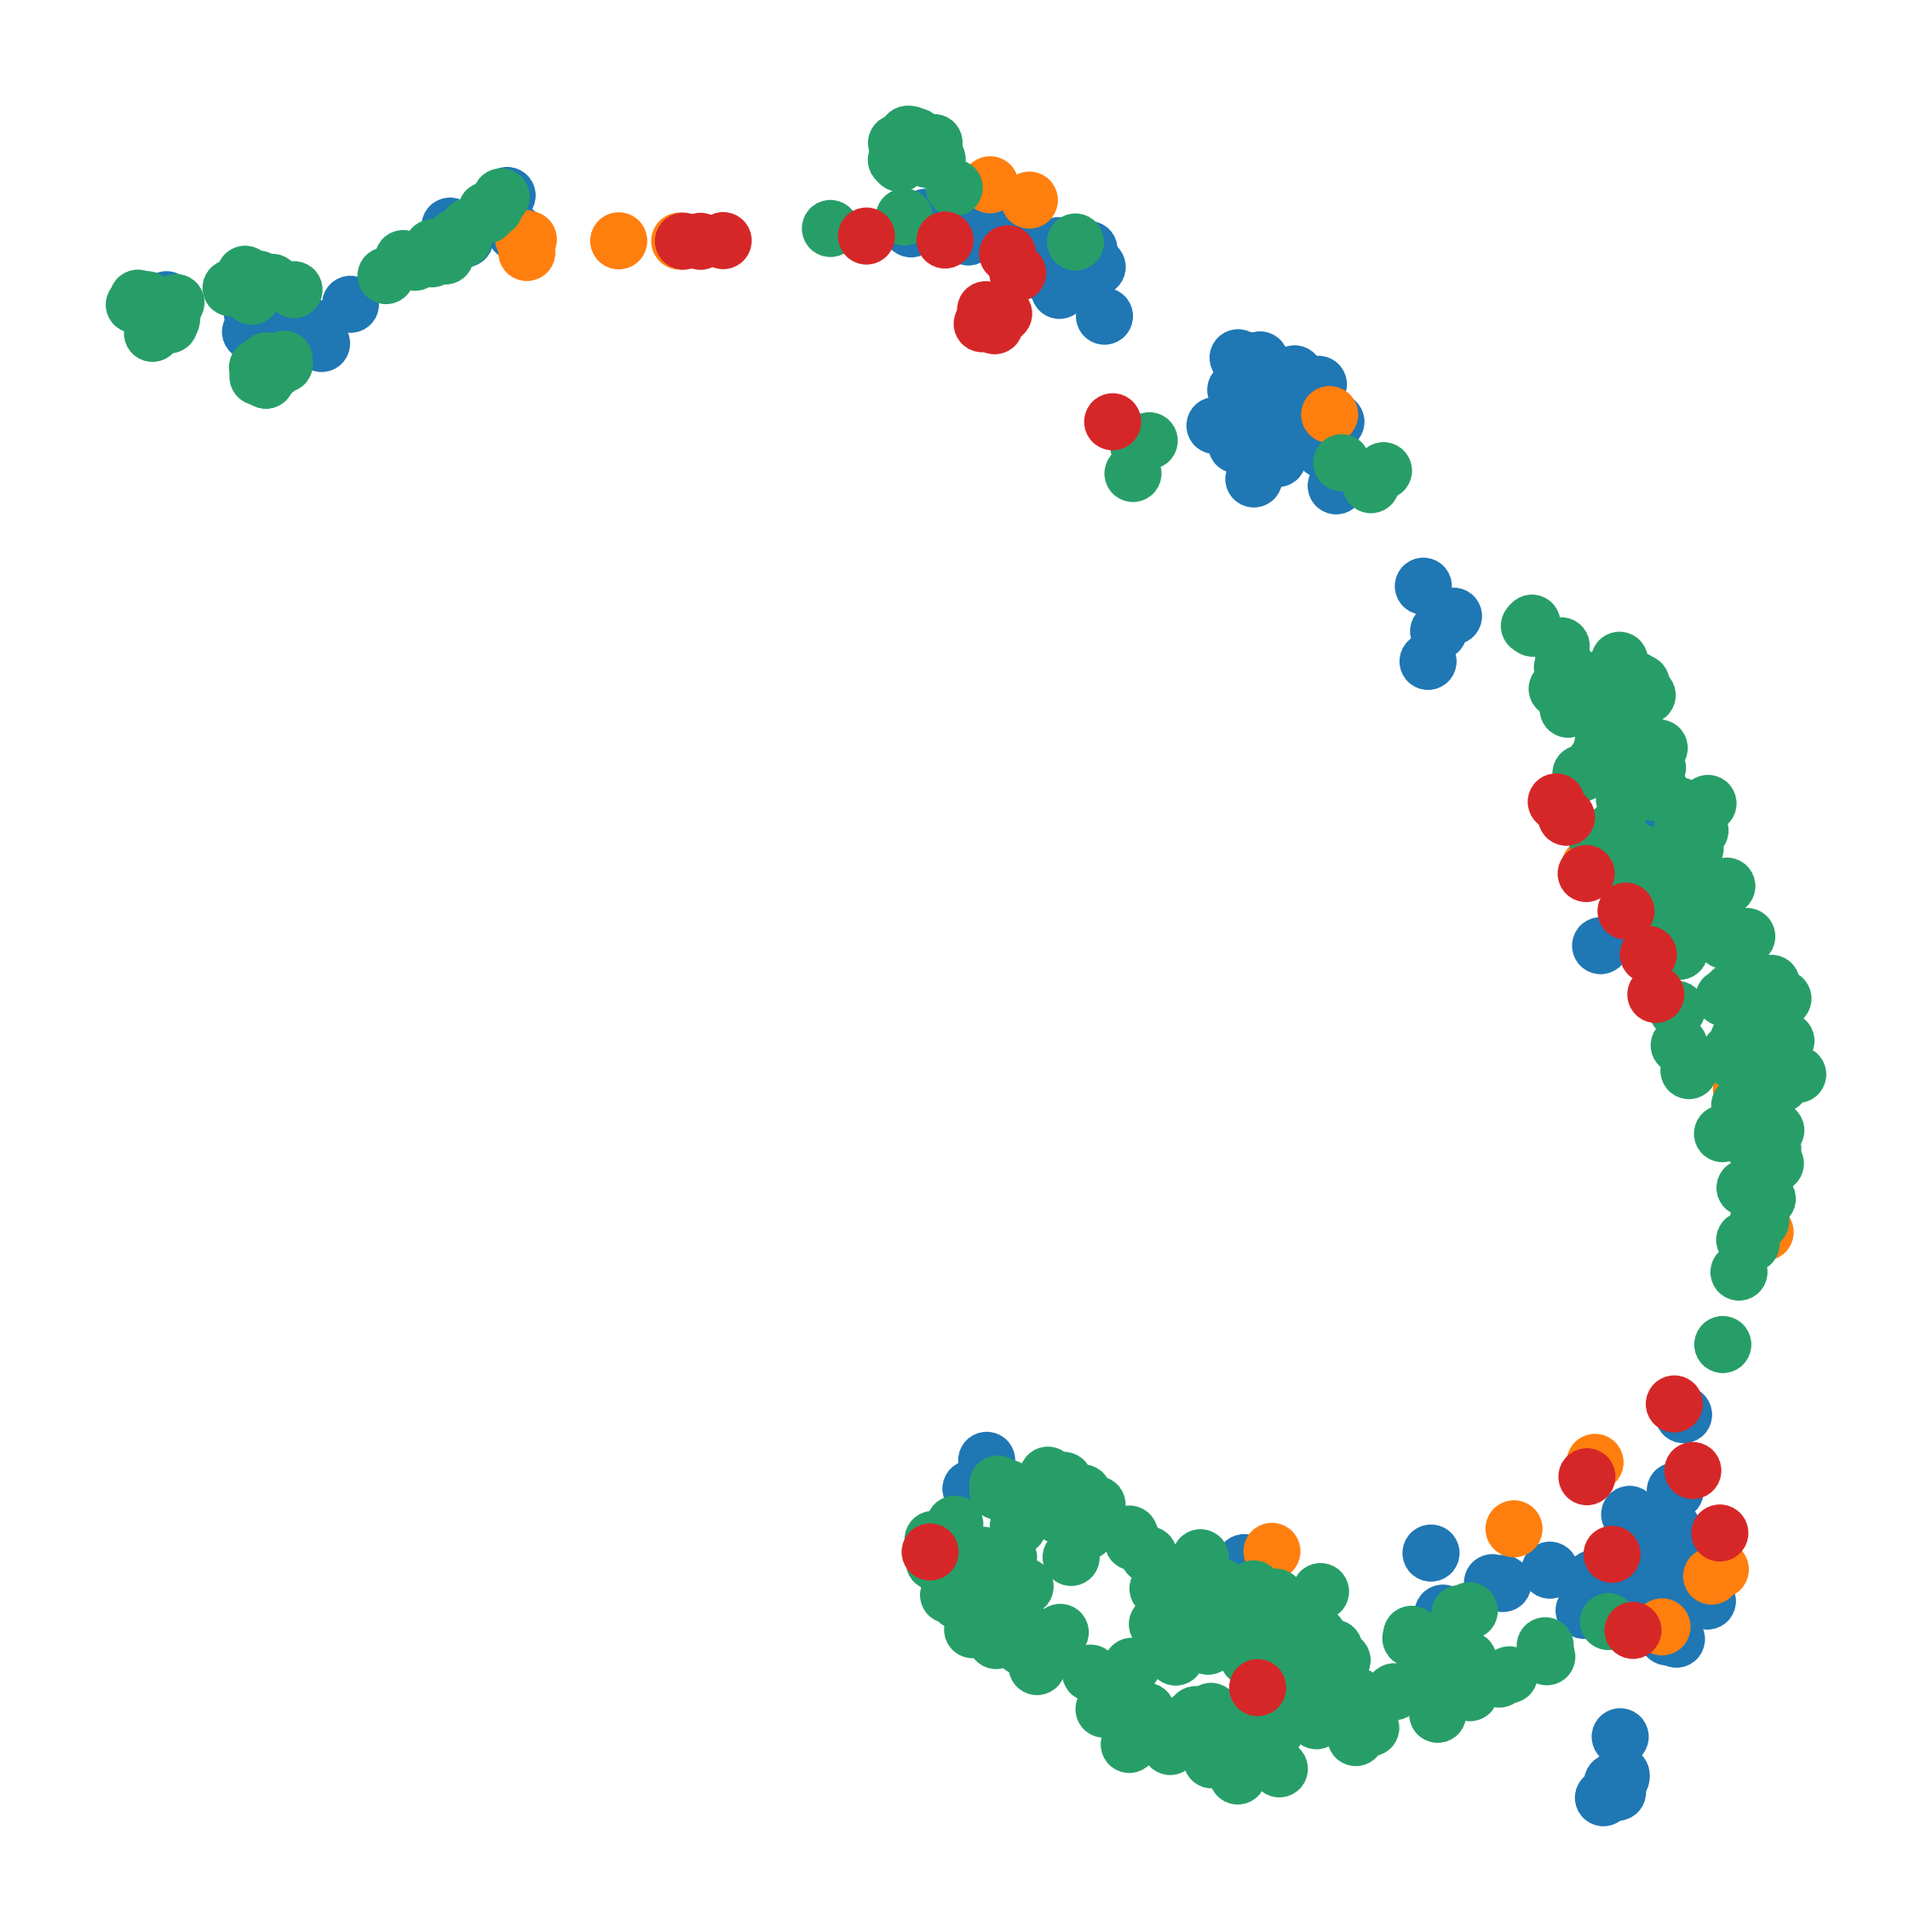

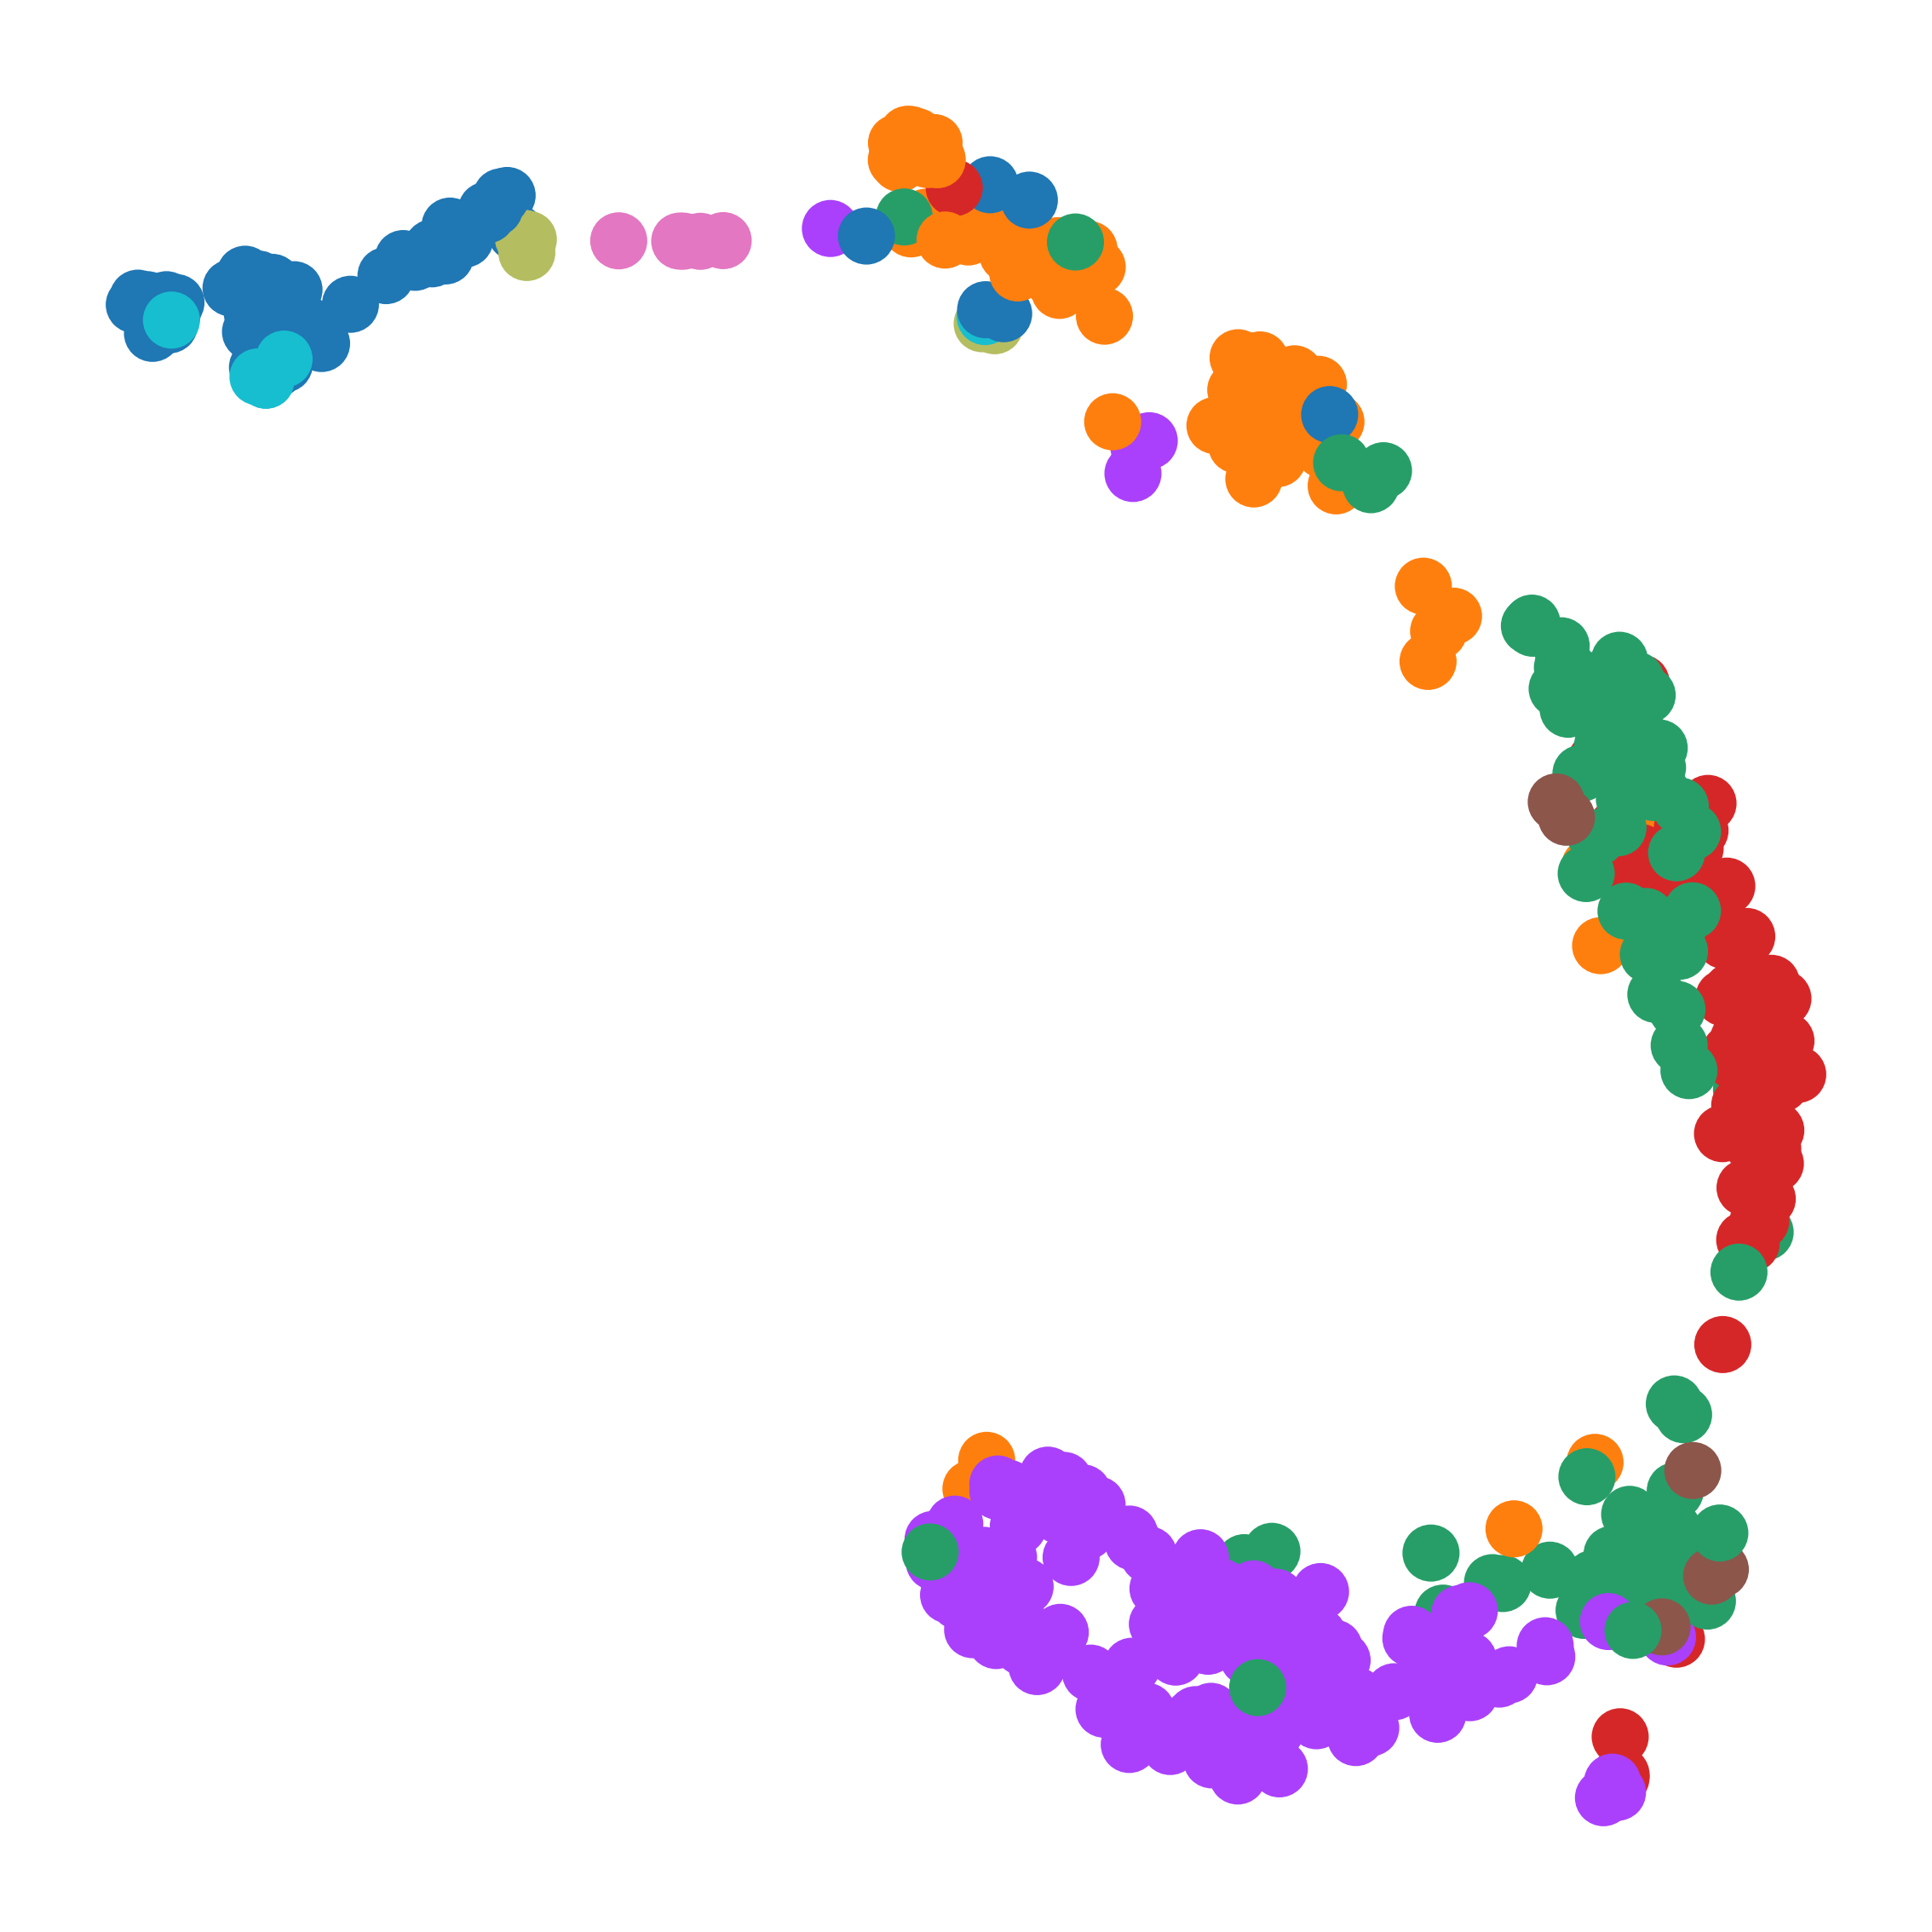

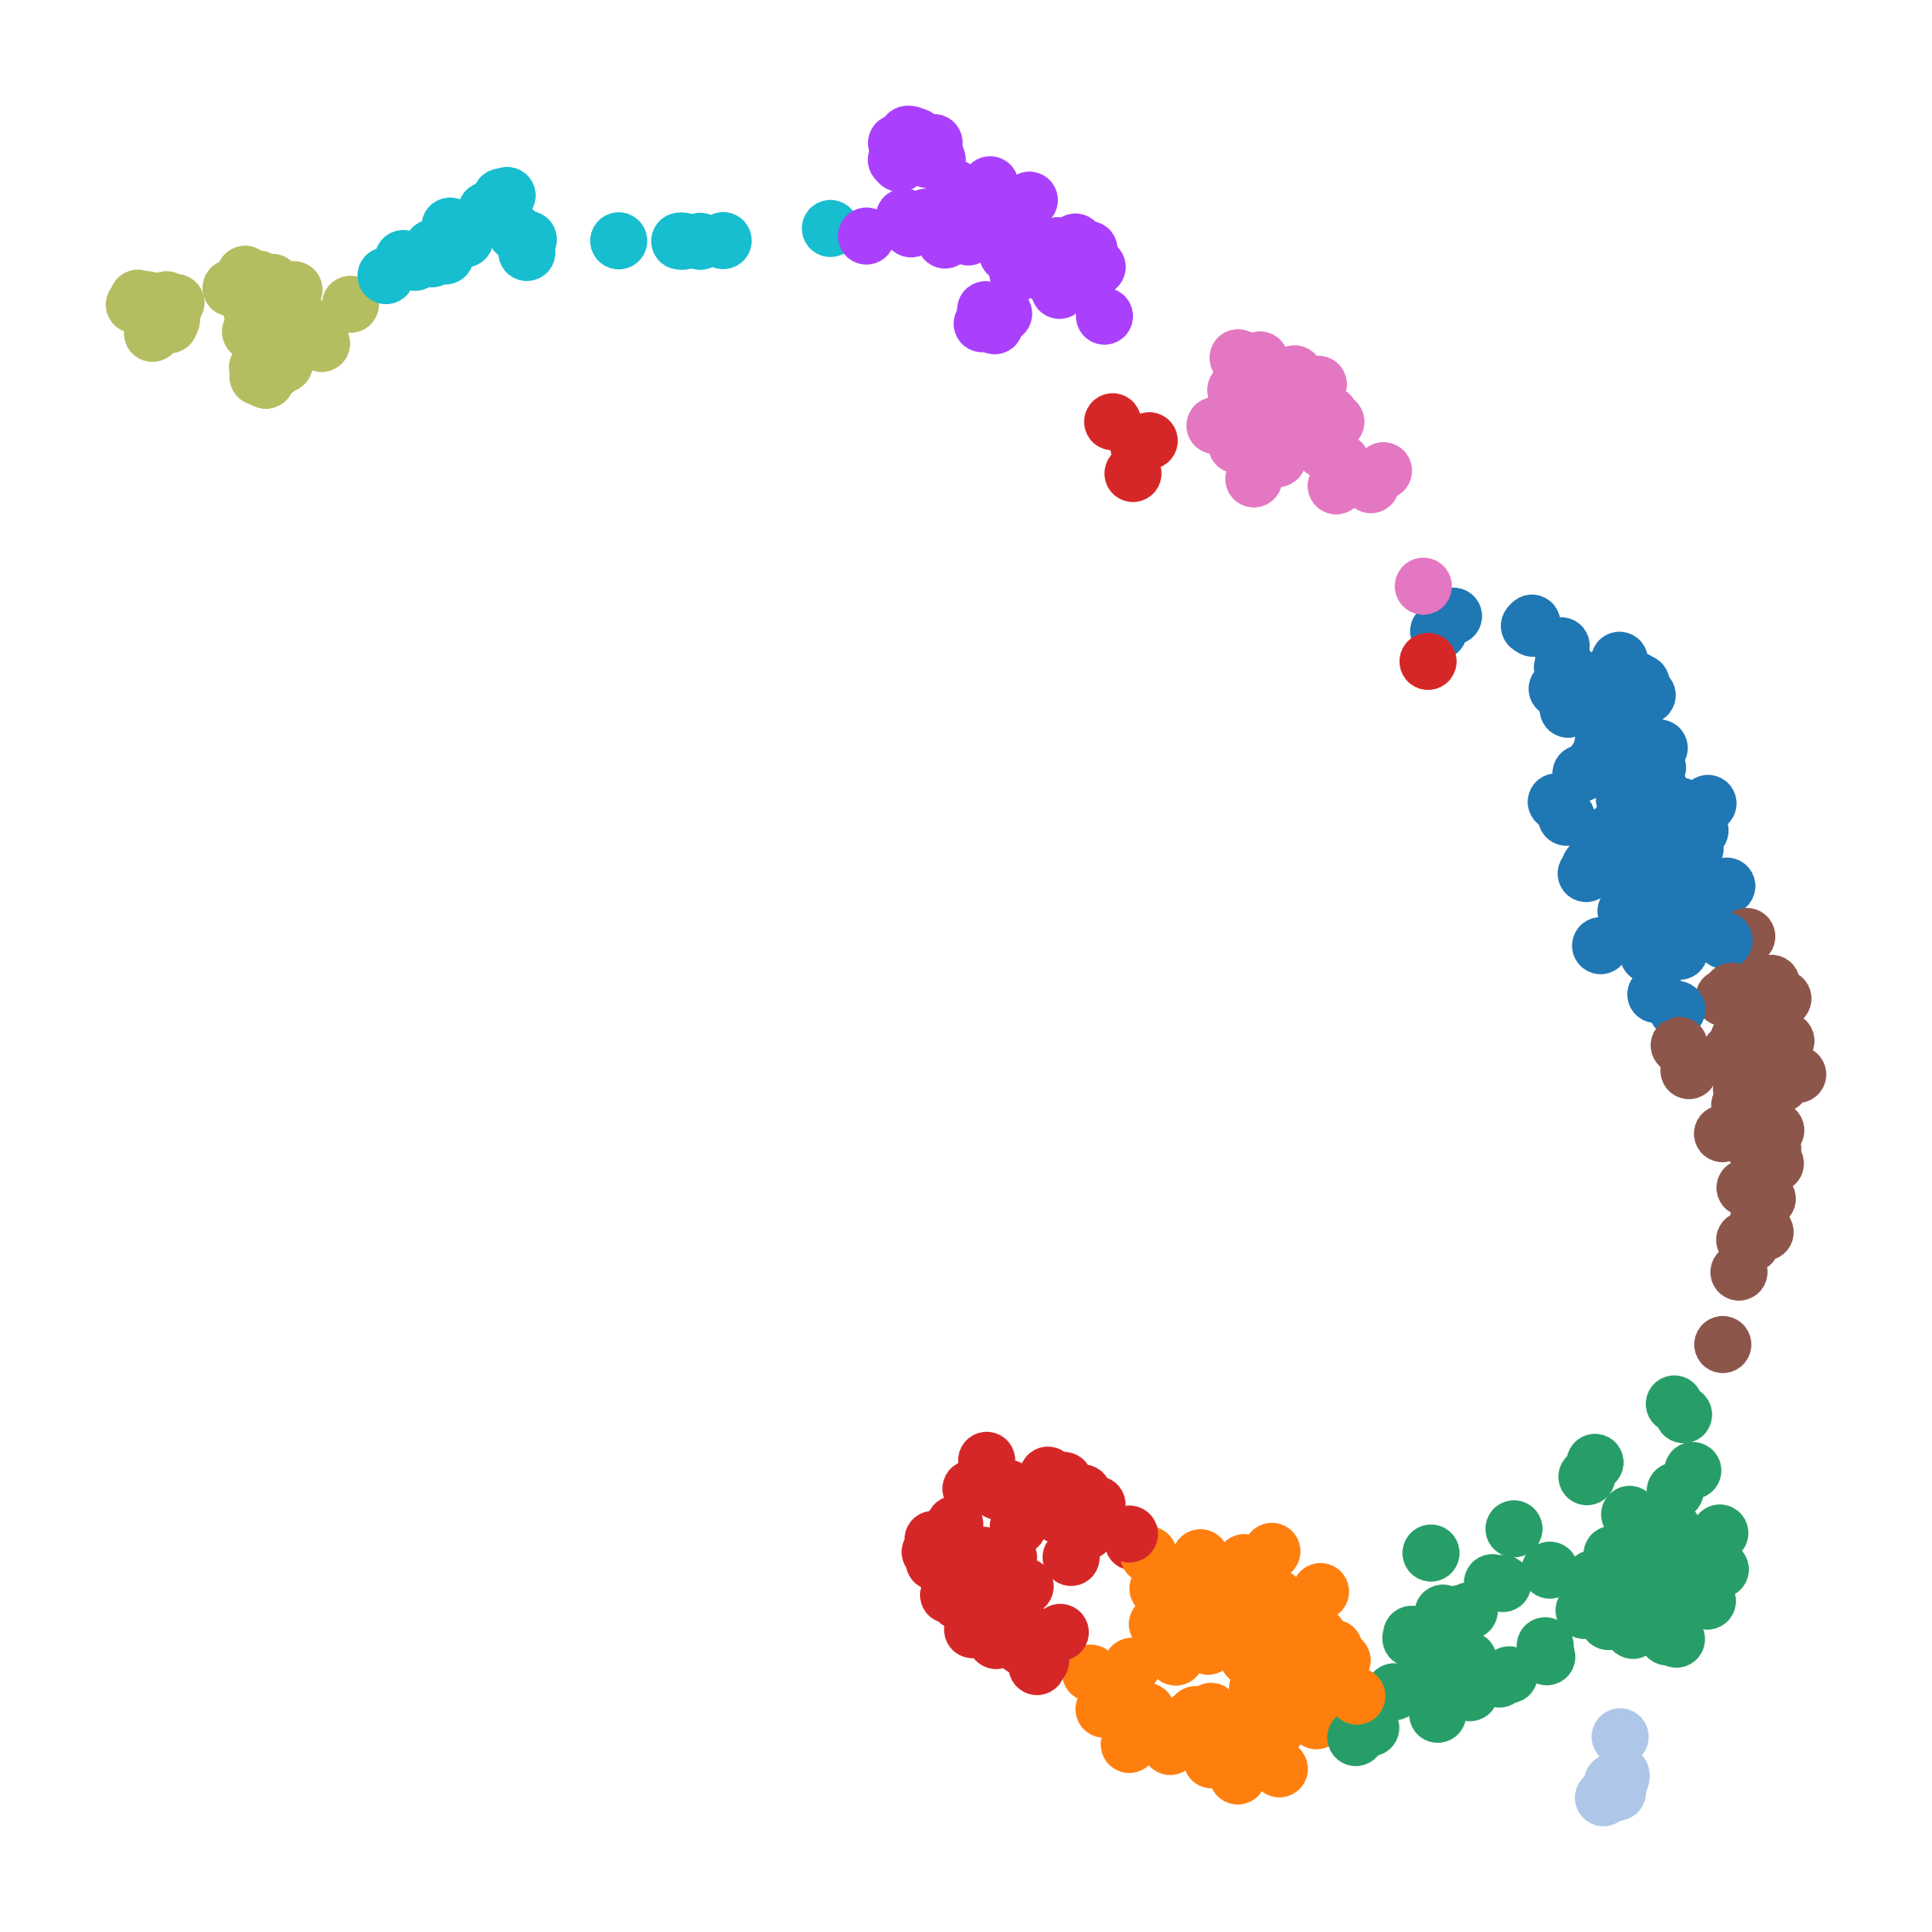

In [27]:
adata_scCorrect = scCorrect(data_list=data_list, batch_categories=conditions, batch_key='batch', max_iteration=2000, early_stop=True, 
                      outdir=path_results, assess=True, preprocessed=False)

# load data

In [46]:
adata_scCorrect = sc.read_h5ad(f'{path_results}adata_scCorrect.h5ad')
adata_scCorrect

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 464 × 2000
    obs: 'cell_type', 'index', 'batch', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'batch_colors', 'batch_entropy_mixing_score', 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'silhouette_score', 'umap'
    obsm: 'X_emb', 'X_scCorrect', 'X_umap'
    obsp: 'connectivities', 'distances'

In [47]:
sc.set_figure_params(dpi=300, figsize=(4, 4), frameon=False)    # TODO 是否画边框

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [48]:
def clear_fig(fig):
    if fig:
        fig.axes[0].set_xlabel(None)
        fig.axes[0].set_ylabel(None)
        fig.tight_layout()
    else:
        pass
    return fig

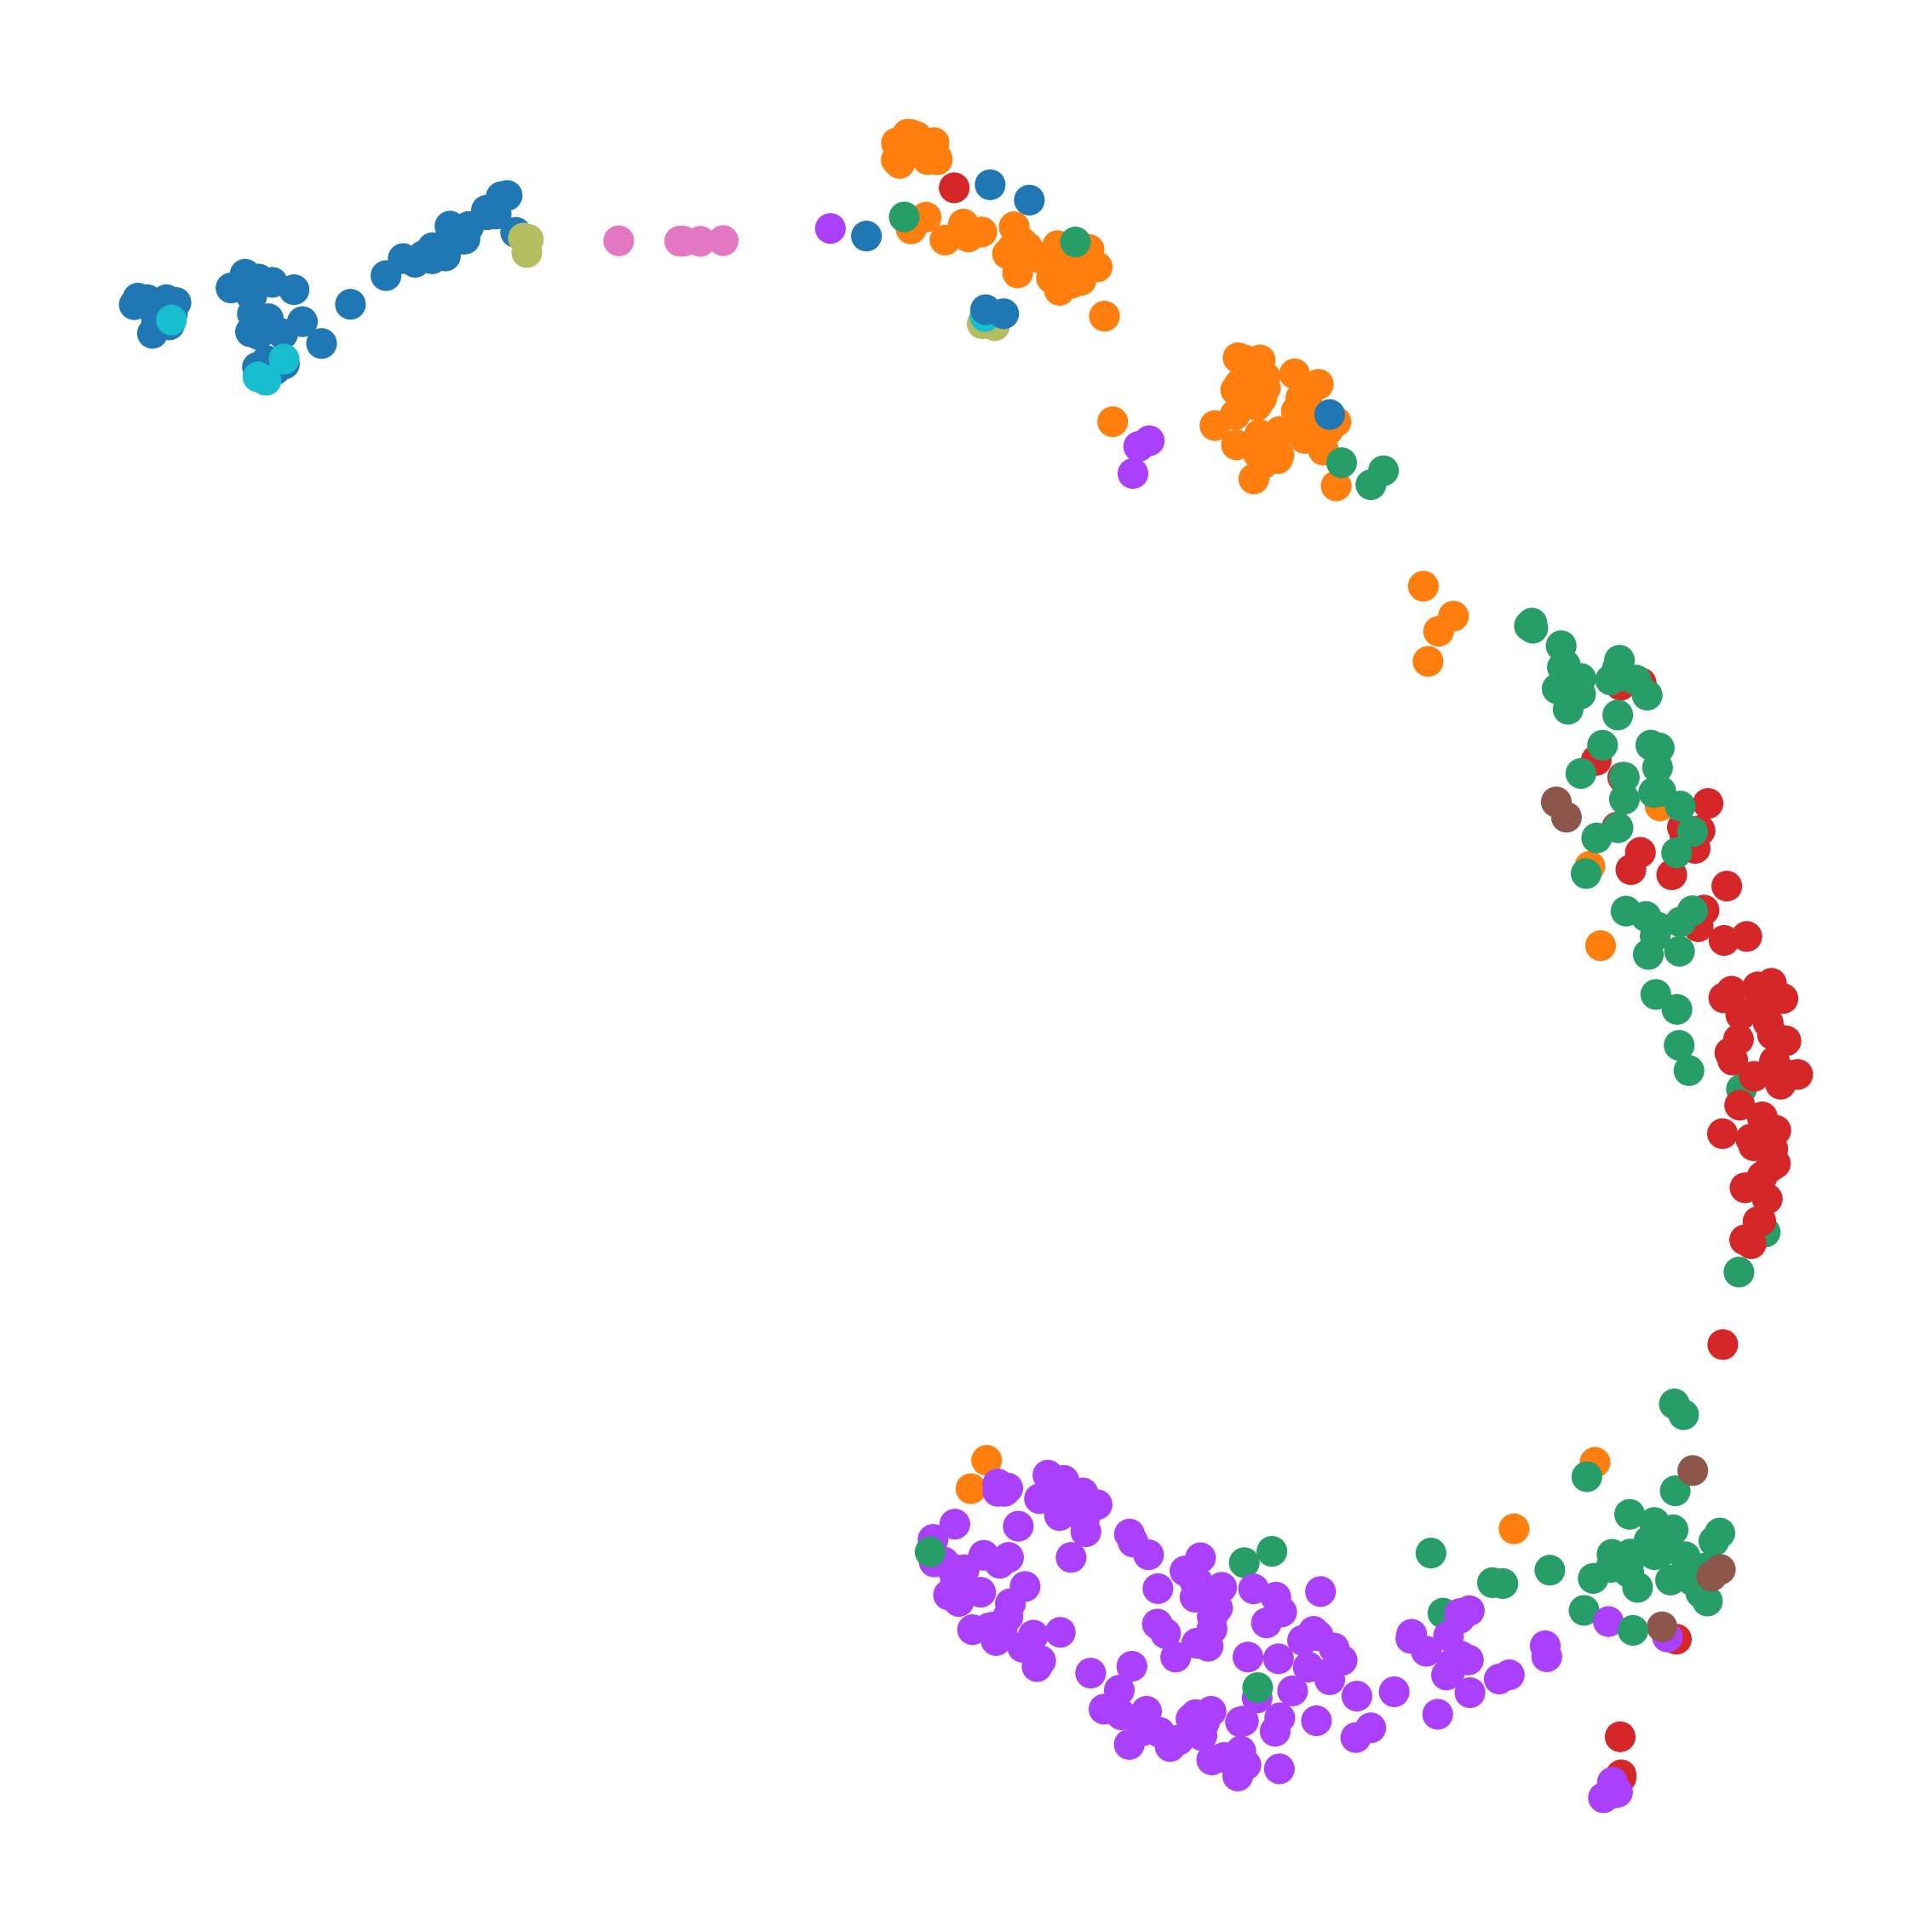

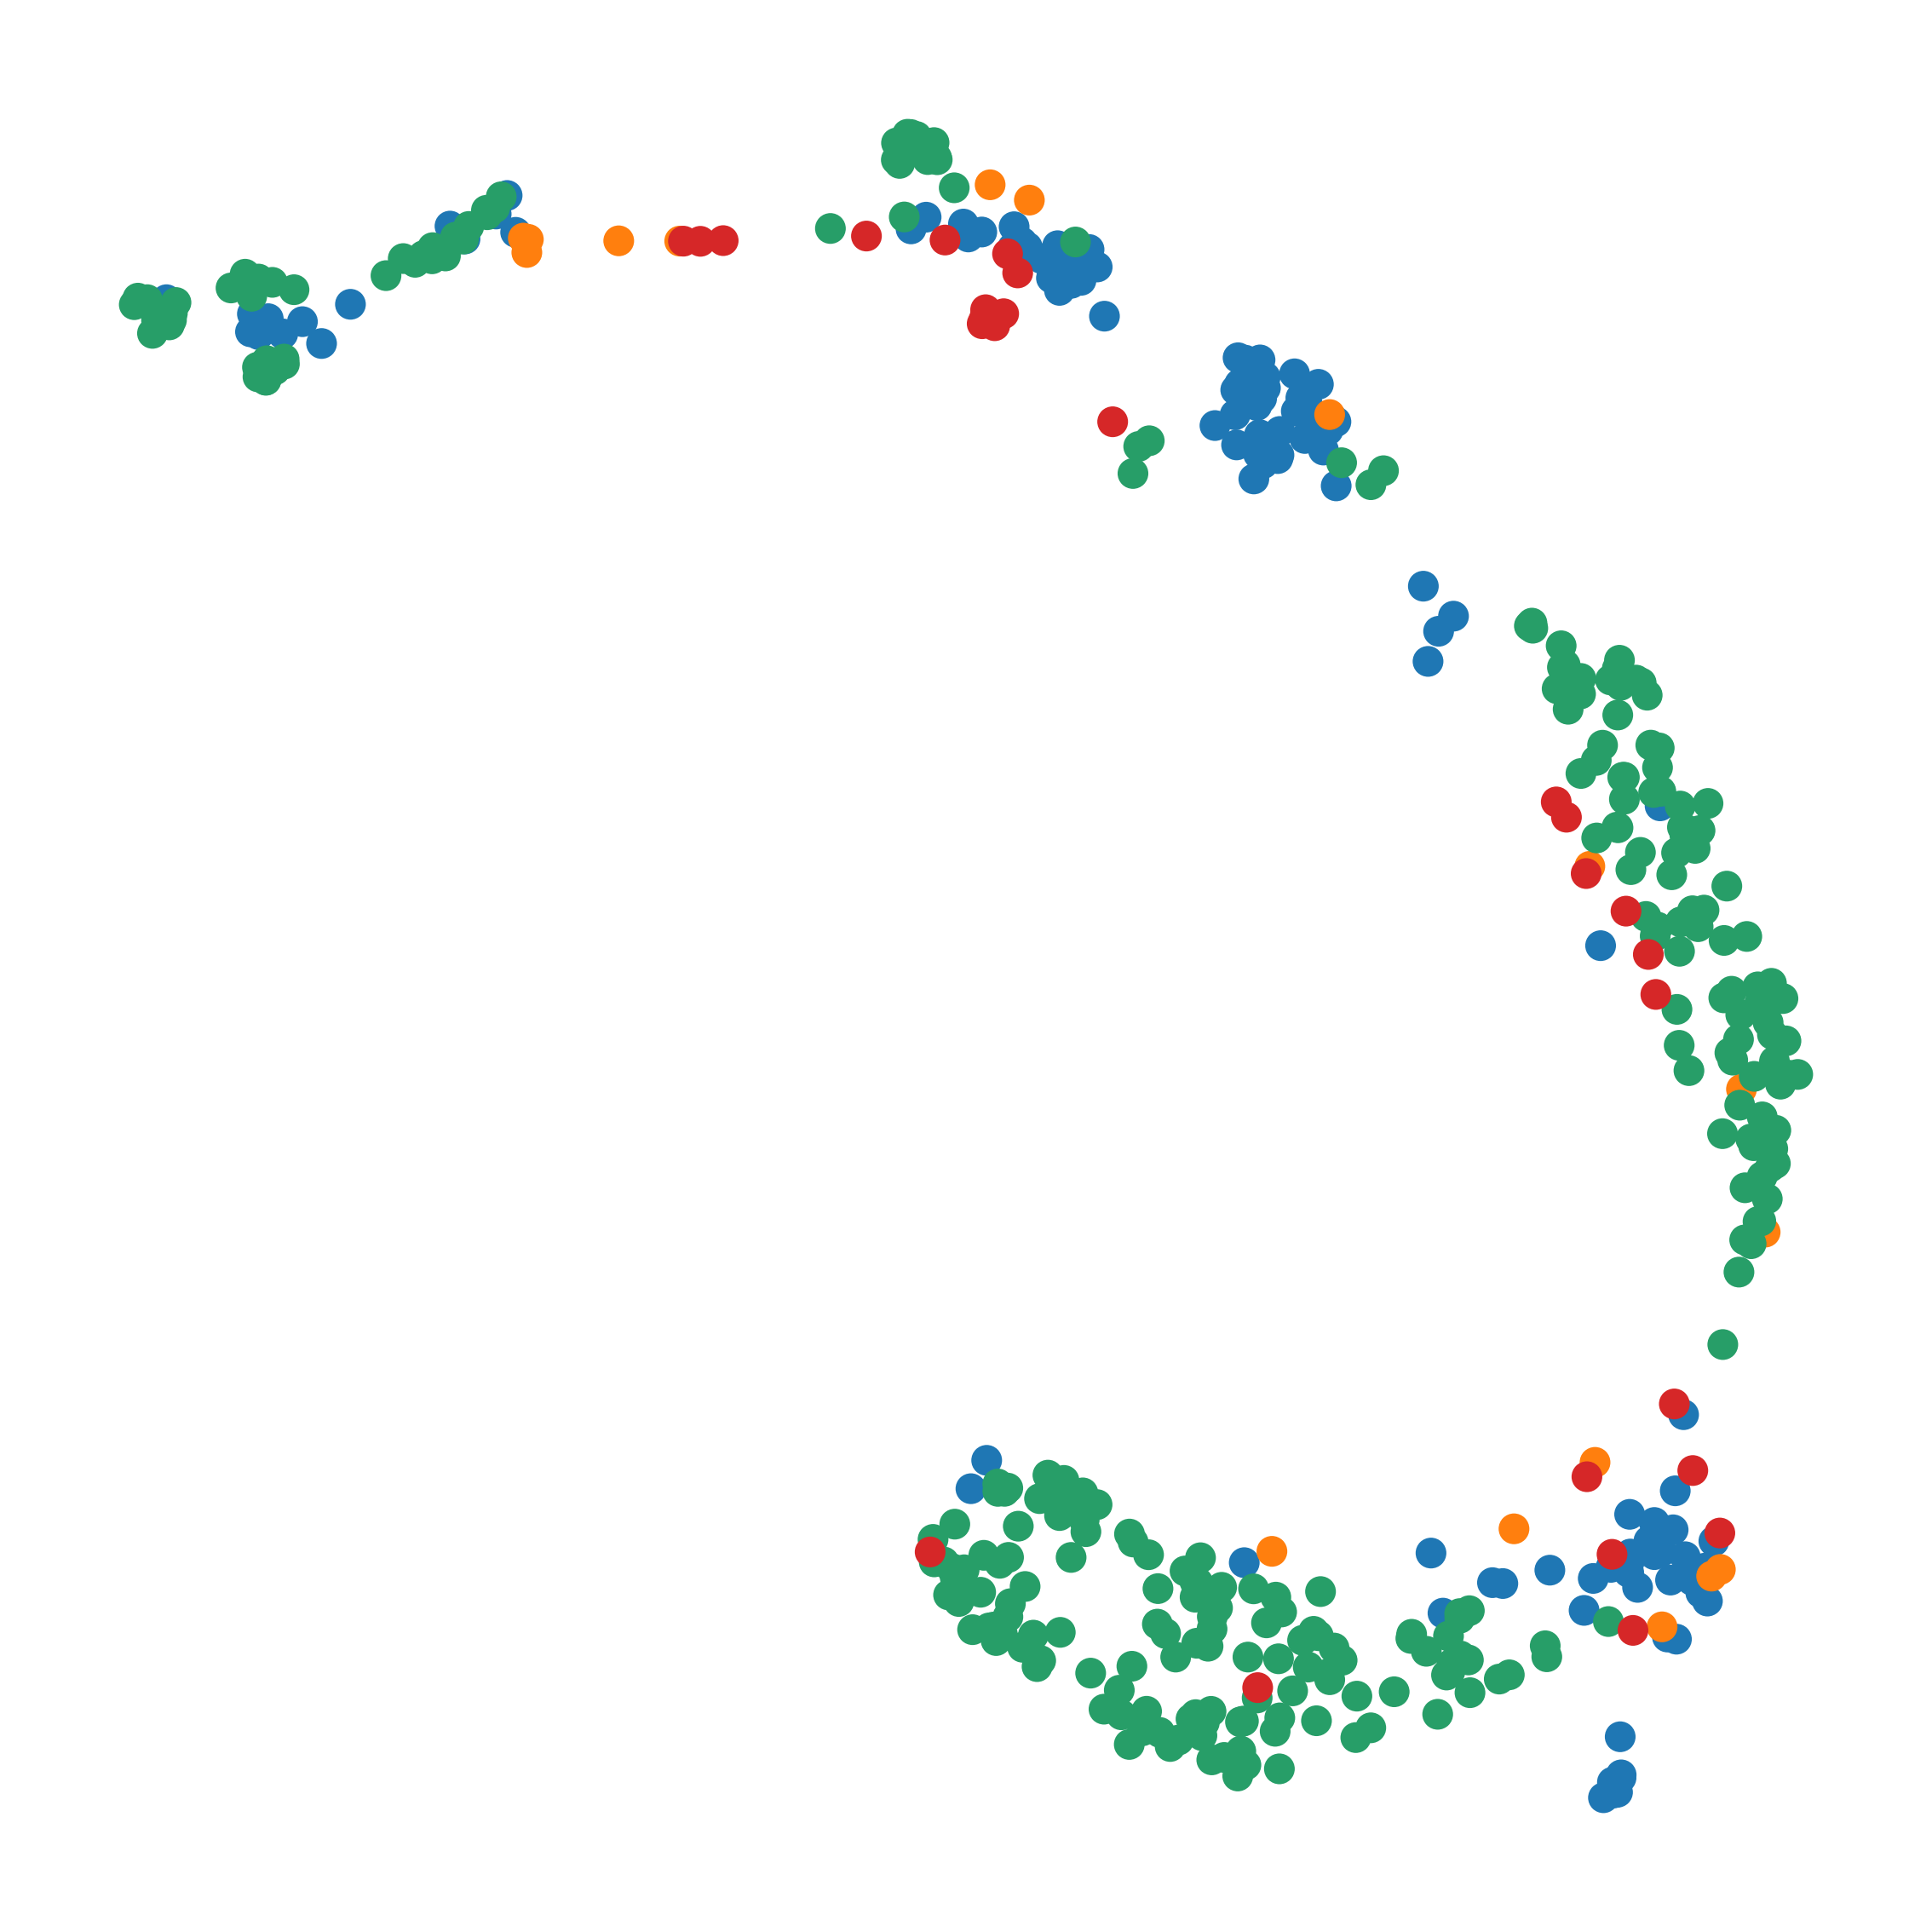

In [49]:
fig = clear_fig(sc.pl.umap(adata_scCorrect, color=['cell_type'], size=75, title='', legend_loc=None, return_fig=True))
# fig.savefig(f'{path_results}/cell_type_new.jpg')

fig = clear_fig(sc.pl.umap(adata_scCorrect, color=['batch'], size=75, title='', legend_loc=None, return_fig=True))
# fig.savefig(f'{path_results}/batch_new.jpg')


In [50]:
sc.tl.paga(adata_scCorrect, groups='cell_type')

[<Axes:xlabel='UMAP1', ylabel='UMAP2'>, <Axes:>]

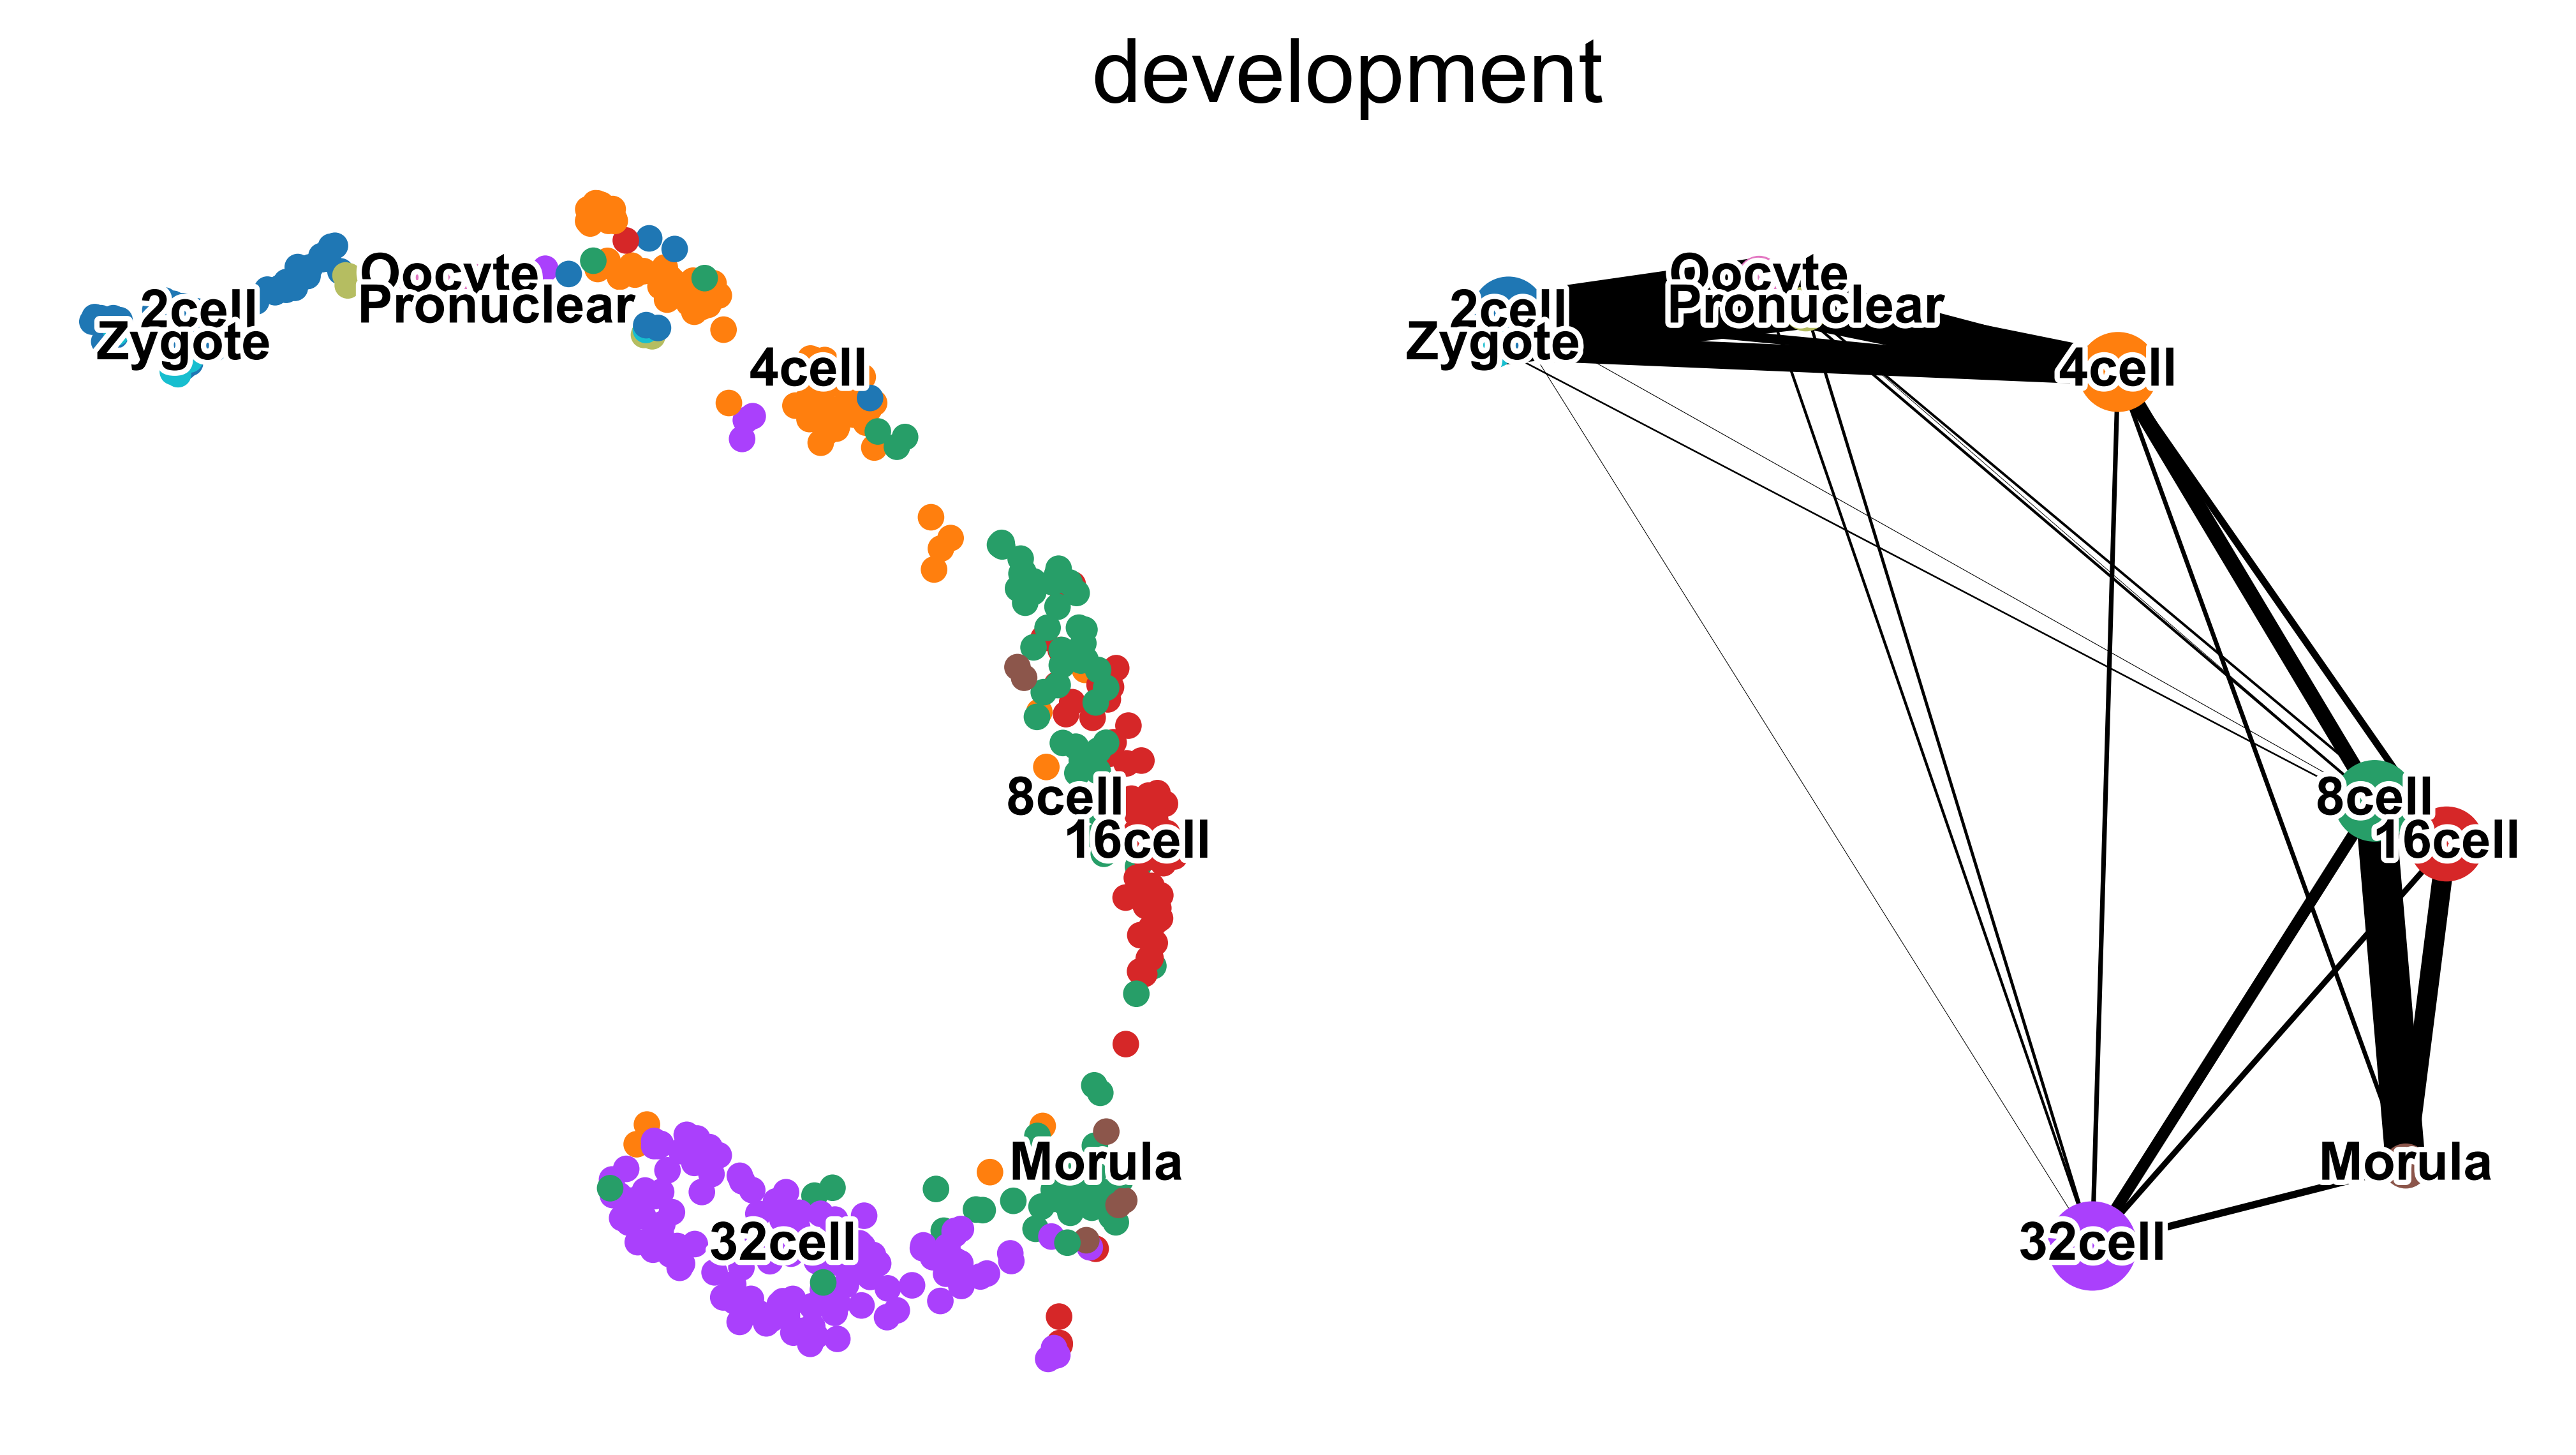

In [52]:
sc.pl.paga_compare(adata_scCorrect, legend_fontsize=10, frameon=False, size=100,
                   title='development', legend_fontoutline=2, show=False)

In [59]:
adata_scCorrect.obs

cell_type            index            batch leiden  \
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      8   
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      8   
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      8   
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      7   
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      8   
...                   ...              ...              ...    ...   
8cell_GSE41873      8cell   8cell_GSE41873      adata_human      2   
8cell_GSE41873      8cell   8cell_GSE41873      adata_human      0   
Morula_GSE41873    Morula  Morula_GSE41873      adata_human      2   
Morula_GSE41873    Morula  Morula_GSE41873      adata_human      0   
Morula_GSE41873    Morula  Morula_GSE41873      adata_human      0   

                 dpt_pseudotime  
2cell_EMTAB3321        0.272796  
2cell_EMTAB3321        0.276534  
2cell_EMTAB3321        0.279787  
2cell_EMTAB3321        0.089973  
2cell_EMTAB3321        0.221628  
...                         ...  
8cell_GSE41873         0.972210  
8cell_GSE41873         0.932610  
Morula_GSE41873        0.954962  
Morula_GSE41873        0.919208  
Morula_GSE41873        0.923813  

[464 rows x 5 columns]

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:452: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pl.colorbar(


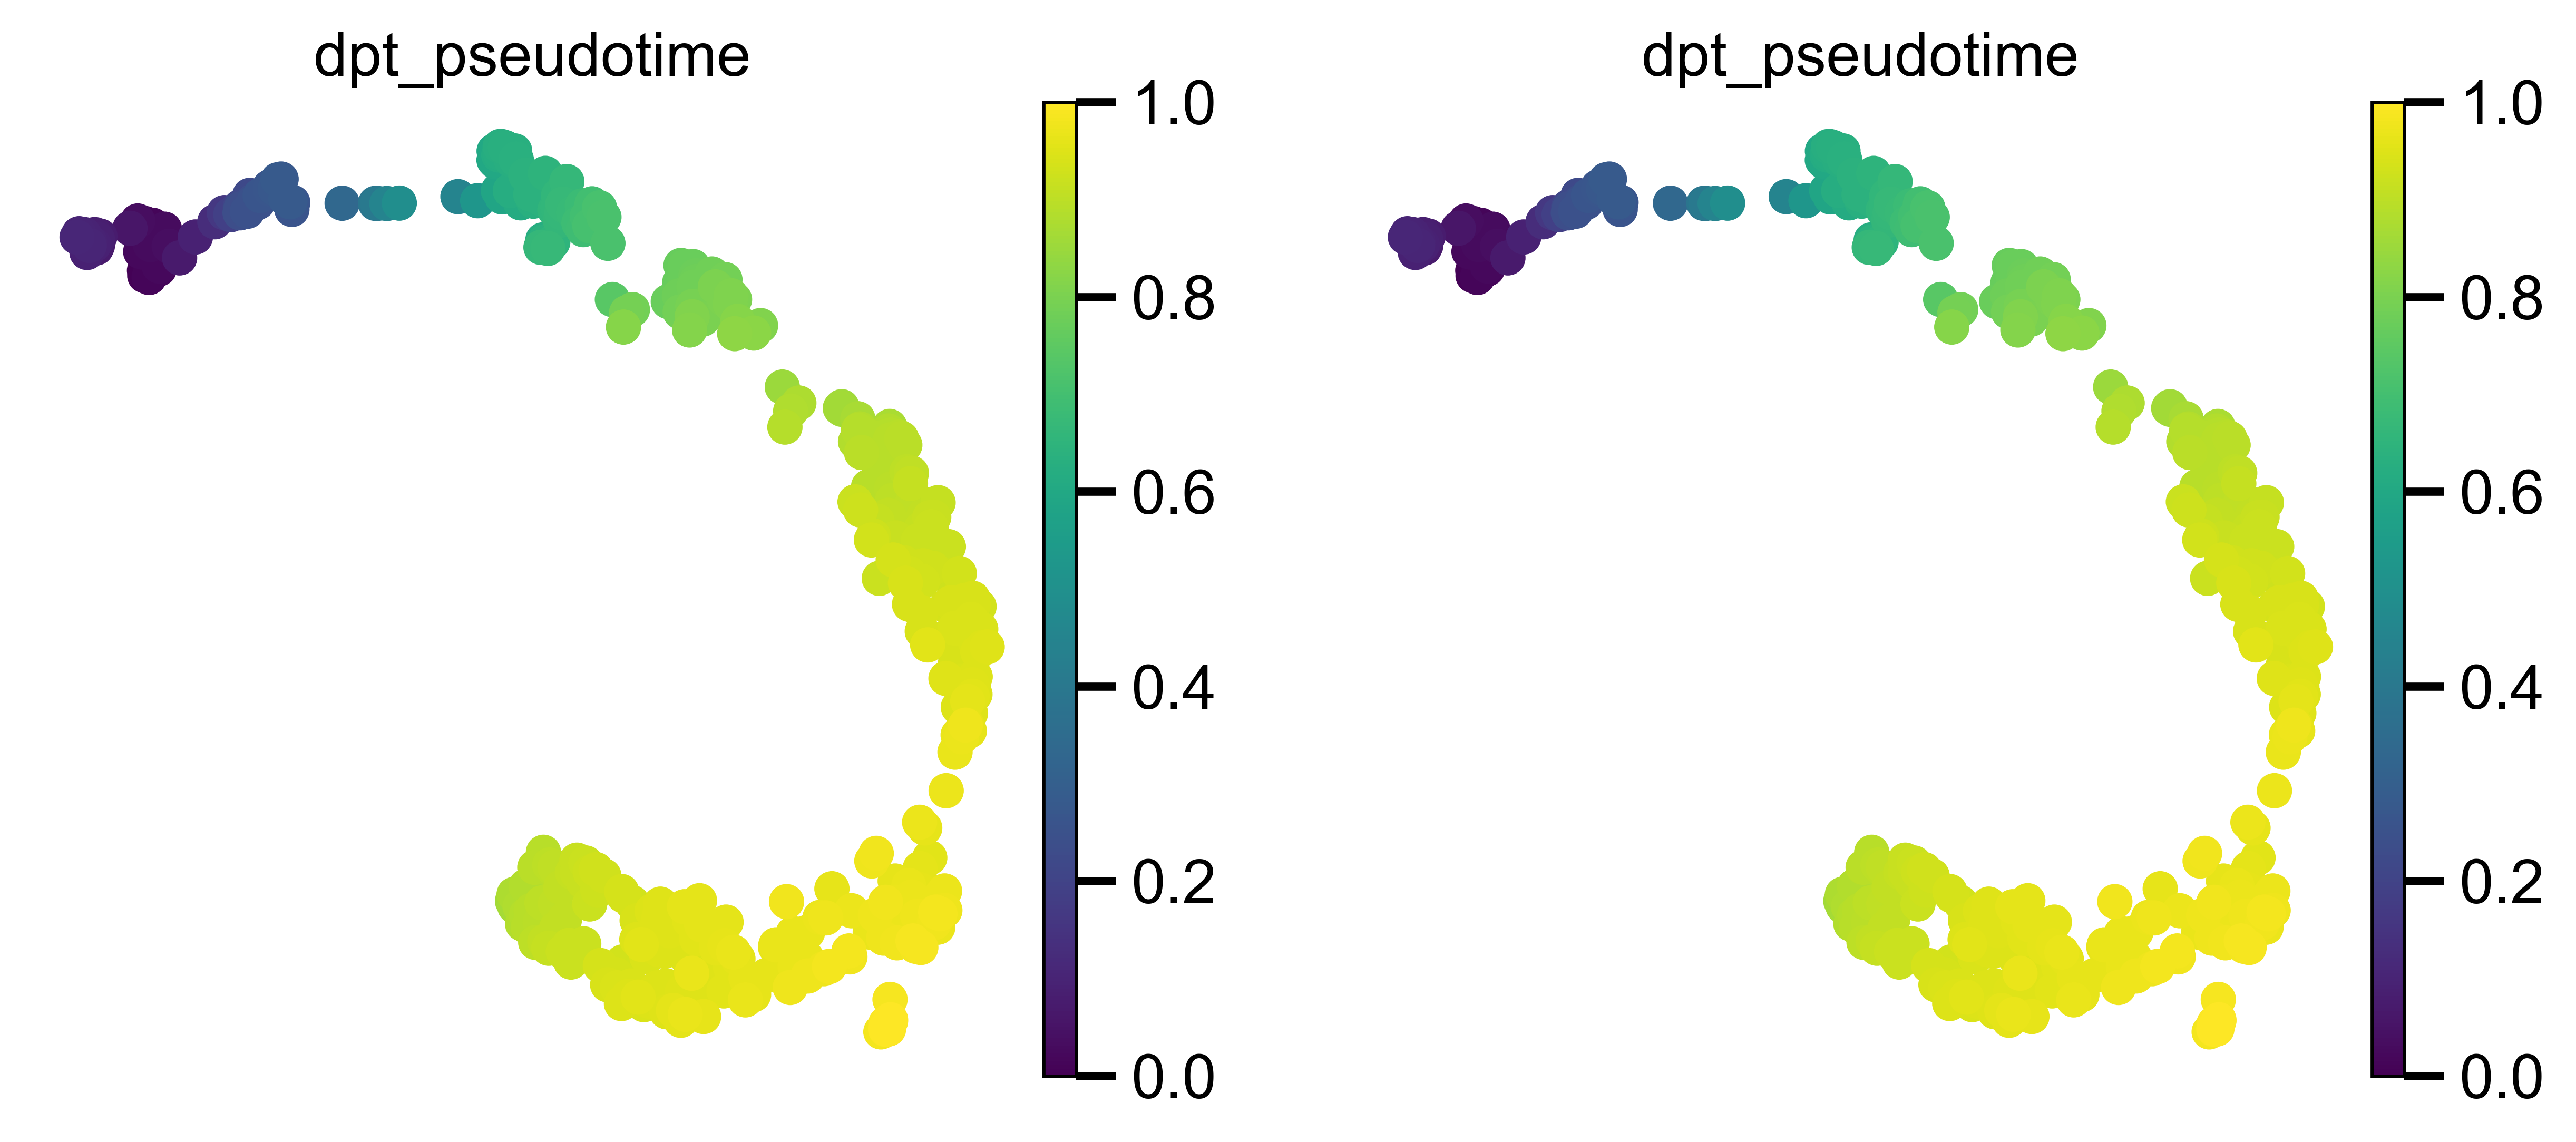

In [68]:
sc.pl.embedding(adata_scCorrect, basis='X_umap', color=['dpt_pseudotime', 'dpt_pseudotime'])

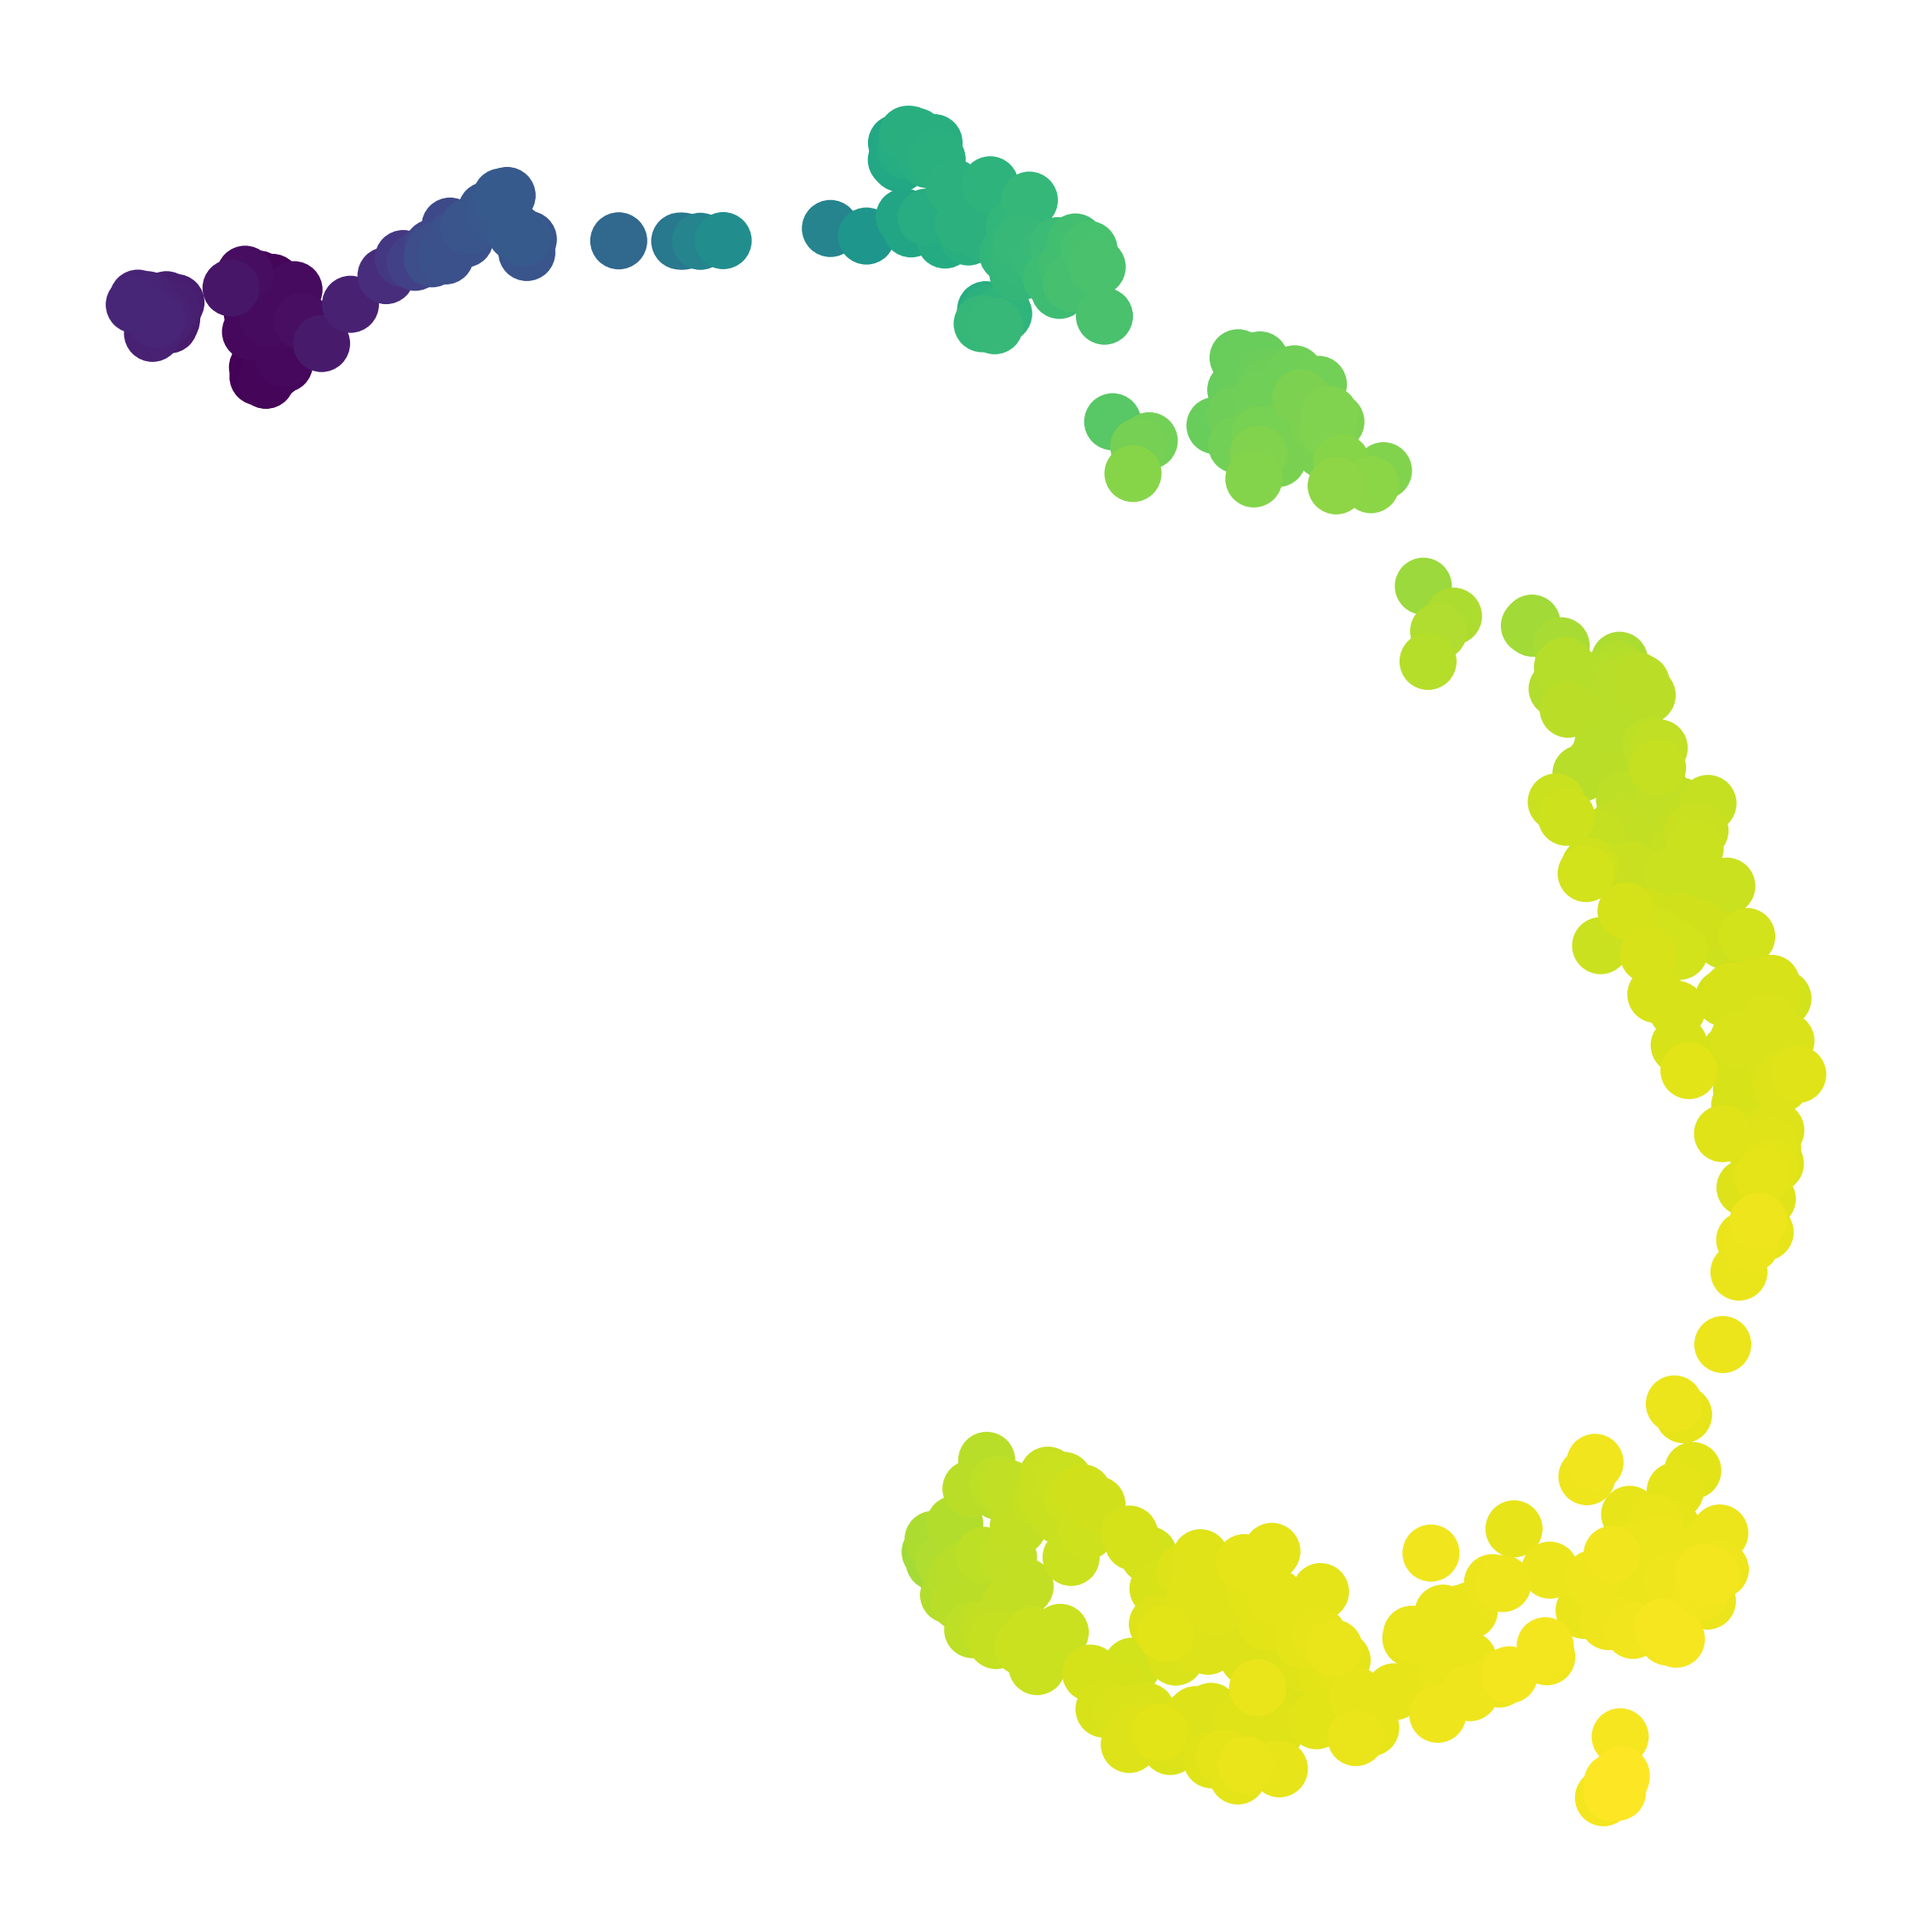

In [67]:
fig = clear_fig(sc.pl.embedding(adata_scCorrect, basis='X_umap', color=['dpt_pseudotime'], return_fig=True, title='', colorbar_loc=None))
fig.savefig(f'{path_results}/dpt_pseudotime.jpg')

In [32]:
adata_scCorrect.obs

cell_type            index            batch leiden
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      8
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      8
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      8
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      7
2cell_EMTAB3321     2cell  2cell_EMTAB3321  adata_EMTAB3321      8
...                   ...              ...              ...    ...
8cell_GSE41873      8cell   8cell_GSE41873      adata_human      2
8cell_GSE41873      8cell   8cell_GSE41873      adata_human      0
Morula_GSE41873    Morula  Morula_GSE41873      adata_human      2
Morula_GSE41873    Morula  Morula_GSE41873      adata_human      0
Morula_GSE41873    Morula  Morula_GSE41873      adata_human      0

[464 rows x 4 columns]

In [95]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
data=cosine_similarity(adata_mouse_human.obsm['X_emb'])
df = pd.DataFrame(data=data, index=adata_mouse_human.obs.index, columns=adata_mouse_human.obs.index)
df

Oocyte    Oocyte  Pronuclear  Pronuclear  Pronuclear     2cell  \
Oocyte      1.000000  0.969027    0.911899    0.928339    0.897215  0.587661   
Oocyte      0.969027  1.000000    0.926806    0.944615    0.897253  0.597802   
Pronuclear  0.911899  0.926806    1.000000    0.994819    0.991594  0.522686   
Pronuclear  0.928339  0.944615    0.994819    1.000000    0.985666  0.534527   
Pronuclear  0.897215  0.897253    0.991594    0.985666    1.000000  0.479290   
2cell       0.587661  0.597802    0.522686    0.534527    0.479290  1.000000   
2cell       0.122639  0.029623    0.140138    0.130473    0.194622  0.389071   
2cell       0.543722  0.579884    0.660892    0.652788    0.631571  0.845207   
4cell      -0.532221 -0.516821   -0.498270   -0.518324   -0.512924  0.055008   
4cell      -0.115164 -0.201002   -0.131903   -0.151940   -0.125174  0.258605   
4cell      -0.716119 -0.686896   -0.767281   -0.763625   -0.802246 -0.166954   
8cell      -0.310384 -0.295315   -0.154149   -0.197312   -0.225502 -0.076869   
8cell      -0.617076 -0.653138   -0.680627   -0.705734   -0.726457 -0.192923   
8cell      -0.477894 -0.588103   -0.609878   -0.630748   -0.625823 -0.145161   
Morula     -0.634198 -0.677975   -0.666666   -0.696718   -0.693976 -0.099665   
Morula     -0.640555 -0.743686   -0.677549   -0.721929   -0.686048 -0.212346   
Morula     -0.773991 -0.841818   -0.807793   -0.843077   -0.814777 -0.285236   
Oocyte      0.843159  0.871093    0.669885    0.694598    0.596638  0.613761   
Oocyte      0.942710  0.963291    0.854664    0.870961    0.801972  0.684408   
Oocyte      0.882953  0.926666    0.773785    0.792227    0.703732  0.626272   
Pronuclear  0.838706  0.818525    0.791205    0.789487    0.769133  0.583932   
Pronuclear  0.657510  0.612796    0.598570    0.586656    0.600447  0.486265   
Pronuclear  0.635263  0.591010    0.531671    0.531551    0.525786  0.446976   
Zygote      0.867262  0.843191    0.808924    0.806896    0.788928  0.530570   
Zygote      0.800019  0.828403    0.676807    0.691828    0.627680  0.615233   
2cell       0.878818  0.872343    0.905765    0.898585    0.881093  0.523209   
2cell       0.885539  0.935181    0.847543    0.873914    0.801415  0.529288   
2cell       0.823285  0.786733    0.746181    0.750693    0.704005  0.338065   
4cell       0.740834  0.657497    0.794623    0.770916    0.820383  0.261052   
4cell       0.776752  0.744676    0.778851    0.781391    0.751536  0.352358   
4cell       0.643028  0.729179    0.707901    0.721577    0.649725  0.419769   
4cell       0.736915  0.712140    0.783377    0.786798    0.759054  0.488005   
8cell      -0.264786 -0.348760   -0.267009   -0.288604   -0.284408  0.232106   
8cell      -0.501691 -0.516868   -0.594462   -0.592365   -0.624520  0.115497   
8cell      -0.473325 -0.549839   -0.453222   -0.488025   -0.450516  0.120674   
8cell      -0.451194 -0.524726   -0.506965   -0.536444   -0.516909  0.133591   
8cell       0.226062  0.216276    0.278694    0.236952    0.297116  0.254320   
8cell      -0.728370 -0.737350   -0.590343   -0.642538   -0.581327 -0.292051   
8cell      -0.342772 -0.385706   -0.100855   -0.163939   -0.049089 -0.257331   
8cell      -0.450342 -0.460386   -0.439447   -0.472315   -0.439656  0.164002   
8cell      -0.590063 -0.648444   -0.598295   -0.621084   -0.591183  0.054069   
8cell      -0.629869 -0.680467   -0.653413   -0.693323   -0.662723 -0.013432   
8cell      -0.329200 -0.351086   -0.281145   -0.312758   -0.299685  0.052419   
Morula     -0.617110 -0.678487   -0.551040   -0.571478   -0.559728 -0.083650   
Morula     -0.206805 -0.224804   -0.037384   -0.060775   -0.045452  0.132789   
Morula     -0.230812 -0.274580   -0.063495   -0.080139   -0.054884  0.059846   

               2cell     2cell     4cell     4cell  ...     8cell     8cell  \
Oocyte      0.122639  0.543722 -0.532221 -0.115164  ...  0.226062 -0.728370   
Oocyte      0.029623  0.579884 -0.516821 -0.201002  ...  0.216276 -0.737350   
Pronuclear  0.14

In [181]:
sc.set_figure_params(dpi=300, figsize=(16, 16), frameon=False)    # TODO 是否画边框

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\scanpy\_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [182]:
ax = sns.heatmap(df,
                 cmap='Blues',
                 annot=False,  # 字体大小不好控制
                 annot_kws={'size': 40, 'weight': 'bold', 'color': 'black'},
                 cbar=False,  # cbar 单独裁剪？
                 linewidths=0.5,
                 xticklabels=True,
                 yticklabels=True,
                 # vmin=-1, 
                 vmax=1, 
                 fmt='g',
                 )

# 紧致
plt.tight_layout()
# 字体大小
ax = plt.gca()
plt.xticks(fontsize=15,rotation =30, ha='right')
plt.yticks(fontsize=15)
# 保存
plt.savefig(f"{path_results}/GSE41873_corr.jpg")
# 展示
plt.show()

C:\Users\10360\anaconda3\envs\py39\lib\site-packages\seaborn\matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
